## https://lifelines.readthedocs.io/en/latest/Quickstart.html#getting-data-in-the-right-format

In [1]:
import sys
sys.executable

'/home/ing/miniconda3/envs/milk/bin/python'

In [2]:
import pandas as pd
import lifelines
import pickle

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import os
import numpy as np
import glob
predicted_sets = glob.glob('../tcga-prad/2019_02_02_10_49_31/*_ypred.npy')
print(len(predicted_sets))
ypred = {}
for pth in predicted_sets:
    c = os.path.basename(pth)[:12]
    y = np.squeeze(np.argmax(np.load(pth), -1))
    print(c,y)
    ypred[c] = y
    

181
TCGA-XJ-A9DX 1
TCGA-EJ-5517 0
TCGA-KK-A6DY 0
TCGA-YL-A8S8 0
TCGA-KK-A6E7 0
TCGA-V1-A9Z7 0
TCGA-EJ-5511 0
TCGA-EJ-5501 0
TCGA-G9-6496 0
TCGA-HC-8260 0
TCGA-YL-A8SK 1
TCGA-EJ-7123 0
TCGA-G9-6362 0
TCGA-KK-A8I9 1
TCGA-V1-A9ZG 0
TCGA-G9-7521 0
TCGA-X4-A8KQ 1
TCGA-EJ-A46I 0
TCGA-YL-A8SK 1
TCGA-YL-A8SH 1
TCGA-HC-A4ZV 1
TCGA-Y6-A8TL 1
TCGA-V1-A9ZI 0
TCGA-QU-A6IP 0
TCGA-EJ-7315 0
TCGA-Y6-A9XI 1
TCGA-X4-A8KS 0
TCGA-HC-A9TE 1
TCGA-HC-8262 1
TCGA-KK-A8IM 0
TCGA-M7-A720 0
TCGA-KK-A5A1 1
TCGA-G9-A9S0 0
TCGA-FC-A66V 0
TCGA-HC-7210 0
TCGA-M7-A724 1
TCGA-EJ-7785 0
TCGA-V1-A8WL 0
TCGA-J4-A67T 0
TCGA-V1-A8WN 0
TCGA-CH-5746 1
TCGA-X4-A8KQ 0
TCGA-YL-A8SK 0
TCGA-YL-A9WI 0
TCGA-EJ-5506 0
TCGA-V1-A8MU 0
TCGA-G9-A9S4 0
TCGA-YL-A9WI 0
TCGA-HC-7740 0
TCGA-HC-A6AS 1
TCGA-YL-A8SL 0
TCGA-YL-A8SI 0
TCGA-X4-A8KS 0
TCGA-HC-7737 0
TCGA-HC-7232 0
TCGA-HC-8216 0
TCGA-QU-A6IN 0
TCGA-VP-A872 0
TCGA-YL-A8SP 1
TCGA-V1-A8MF 0
TCGA-CH-5769 1
TCGA-J4-A67O 0
TCGA-2A-A8VT 0
TCGA-KK-A7B1 0
TCGA-EJ-7328 0
TCGA-EJ-5497 0
TCGA-J

In [4]:
# translate the pickled data:
days_to_biochem_recurr = pickle.load(open('../prad_days_to_biochemical_recurrence.pkl', 'rb'))
print(len(days_to_biochem_recurr.keys()))

427


116
28


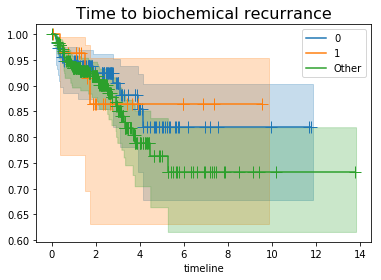

In [5]:
T_0, E_0 = [], []
T_1, E_1 = [], []
T, E = [], []
for k, v in days_to_biochem_recurr.items():
    if k in ypred.keys():
        if ypred[k] == 0:
            T_0.append(v[0] / 365)
            E_0.append(v[1])
        else:
            T_1.append(v[0] / 365)
            E_1.append(v[1])
    else:
        T.append(v[0] / 365)
        E.append(v[1])
            
print(len(T_0))
print(len(T_1))
kmf = lifelines.KaplanMeierFitter()
kmf.fit(T_0, E_0, label='0')
ax = kmf.plot(show_censors=True)
kmf.fit(T_1, E_1, label='1')
ax = kmf.plot(show_censors=True, ax=ax)
kmf.fit(T, E, label='Other')
ax = kmf.plot(show_censors=True, ax=ax)
ax.set_title('Time to biochemical recurrance', fontsize=16)
plt.savefig('prad_km_time_to_biochem_recurrance.png', bbox_inches='tight')
# plt.legend(fontsize=14)

In [6]:
result = lifelines.statistics.logrank_test(T_0, T_1, event_observed_A=E_0, event_observed_B=E_1)
result.print_summary()
print(result.p_value)
print(result.test_statistic)
print('------------------------------------------------------------')

result = lifelines.statistics.survival_difference_at_fixed_point_in_time_test(5, durations_A=T_0, durations_B=T_1,
    event_observed_A=E_0, event_observed_B=E_1)
result.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
test_statistic    p  -log2(p)
          0.03 0.86      0.22
0.8608488452802594
0.030727888631238598
------------------------------------------------------------
<lifelines.StatisticalResult>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 5

---
test_statistic    p  -log2(p)
          0.20 0.65      0.62


In [7]:
days_to_new_tumor = pickle.load(open('../prad_days_to_new_tumor_event.pkl', 'rb'))

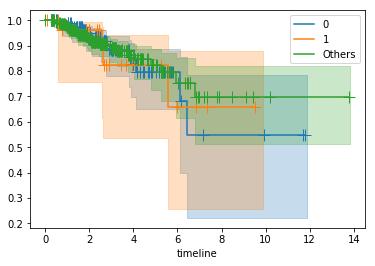

In [8]:
T_0, E_0 = [], []
T_1, E_1 = [], []
T, E = [], []
for k, v in days_to_new_tumor.items():
    if k in ypred.keys():
        if ypred[k] == 0:
            T_0.append(v[0] / 365)
            E_0.append(v[1])
        else:
            T_1.append(v[0] / 365)
            E_1.append(v[1])
    else:
        T.append(v[0] / 365)
        E.append(v[1])
            
kmf = lifelines.KaplanMeierFitter()
kmf.fit(T_0, E_0, label='0')
ax = kmf.plot(show_censors=True)
kmf.fit(T_1, E_1, label='1')
ax = kmf.plot(show_censors=True, ax=ax)
kmf.fit(T, E, label='Others')
ax = kmf.plot(show_censors=True, ax=ax)

In [9]:
result = lifelines.statistics.logrank_test(T_0, T_1, event_observed_A=E_0, event_observed_B=E_1)
result.print_summary()
print(result.p_value)
print(result.test_statistic)
print('------------------------------------------------------------')

result = lifelines.statistics.survival_difference_at_fixed_point_in_time_test(5, durations_A=T_0, durations_B=T_1,
    event_observed_A=E_0, event_observed_B=E_1)
result.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
test_statistic    p  -log2(p)
          0.02 0.88      0.18
0.8833913671995516
0.02151250950755444
------------------------------------------------------------
<lifelines.StatisticalResult>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 5

---
test_statistic    p  -log2(p)
          0.05 0.82      0.29
